# Static Arrays

In statically typed languages like Java, C++ and C#, arrays have to have an allocated size and type when initialized. These are known as static arrays.

They are called static because the size of the array cannot change once declared. And once the array is full, it can not store additional elements. Dynamically typed languages like JavaScript or Python have dynamic arrays.

## Reading from an array

To read an individual element from an array we can choose the position we want to access via an index. Below we have initialized an array of size 3 called myArray. We also attempt to access an arbitrary element using the index i.

```python
# initialize myArray
myArray = [1,3,5]

# access an arbitrary element, where i is the index of the desired value
myArray[i]
```

Accessing a single element in an array is always instant because each index of myArray is mapped to an address in the RAM. Regardless of the size of the input array, the time taken to access a single element is the same. We refer to this operation as $O(1)$ in terms of time complexity (number of operations does not grow as the size of the data/input grows)

### Traversing an array
```python
for i in range(len(myArray)):
   print(myArray[i])
```
To traverse through an array of size n the time complexity is O(n)

---

## Deleting from an array

### Deleting from the end

In statically typed languages, all array indices are filled with 0s or some default value upon initialization, denoting an empty array.

When we want to remove an element from the last index of an array, setting its value to `0 / null` or `-1` is the best we can do. This is known as a *soft delete*. The element is not being "deleted" per se, but it is being overwritten by a value that denotes an empty index.

In [ ]:
# Remove from the last position in the array if the array
# is not empty (i.e. length is non-zero).
def removeEnd(arr, length):
    if length > 0:
        # Overwrite last element with some default value.
        # We would also consider the length to be decreased by 1.
        arr[length - 1] = 0

### Deleting at the ith position

We could naively just replace it with a 0, but this would break the contiguous nature of our array (this is because the size of an array is fixed!) Notice that deleting from the end of an array doesn't make it non-contigious, but deleting from somewhere in the middle will.

We instead shift the values (after the deletion index) leftwards:

1. We are given the deletioningg index i.
2. We iterate starting from i + 1 until the end of the array - shift each element 1 position to the left.
3. (Optional) We replace the last element with a 0 or null to mark it empty, and decrement the length by 1.

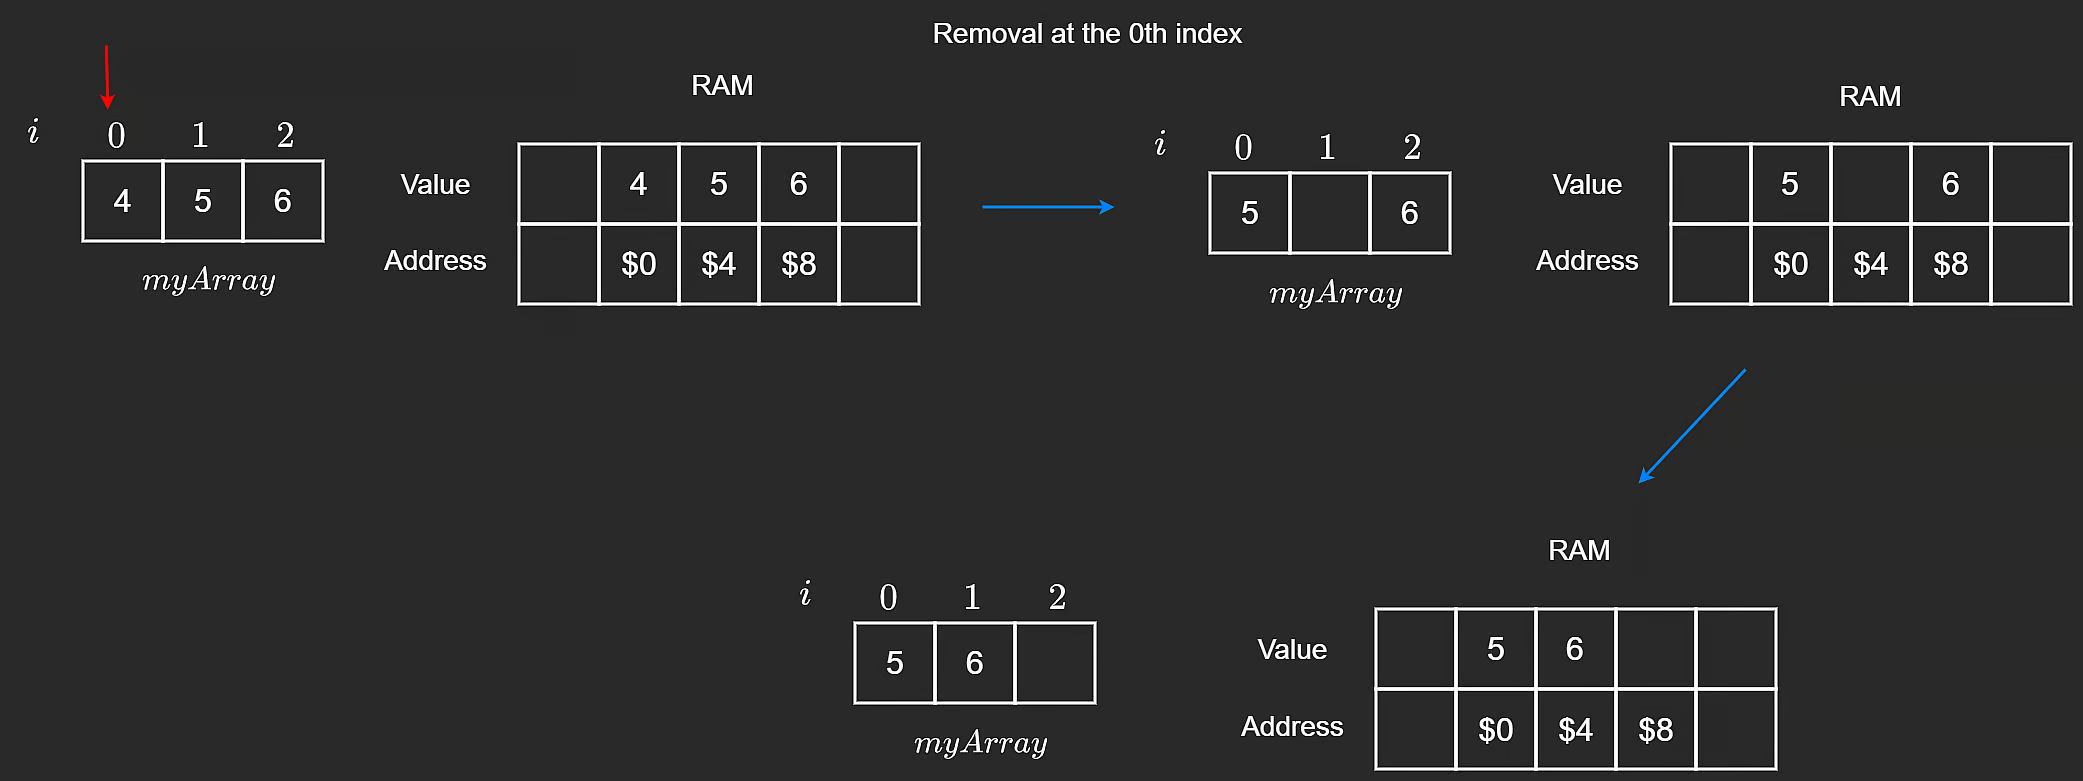

> The worst case would be that we need to shift all of the elements to the left. This would occur if the target index is the first index of the array. Therefore, the code above is O(n)

## Insertion

### Insertion at the end

Similar to deletion, if we want to insert an element at the end of the array, we can simply insert it at the last open position(s) which will be at index length where length is the number of elements in the array. Note that this means the length (number of 'real' elements in array) is less than the capacity (size or memory allocated for this array)

> Time complexity is O(1)

### Insertion in the middle

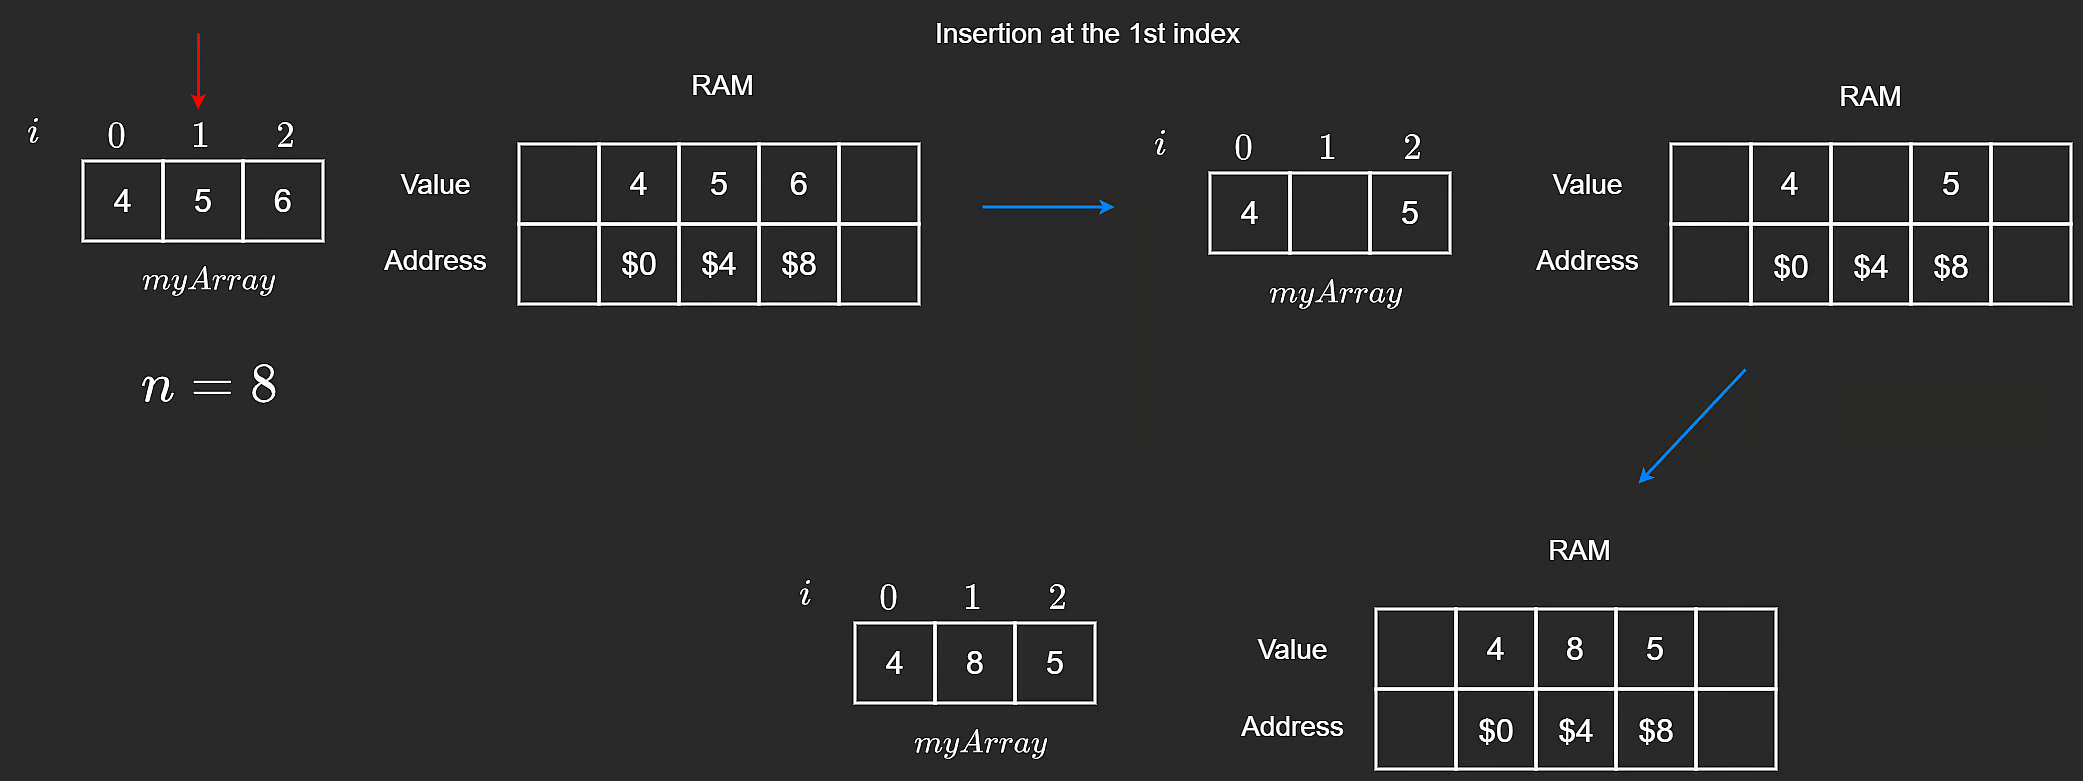

The below image visualizes the insertion of 8 at index 1 in the array [4, 5, 6]. Since we don't have enough space to keep the last element 6, it is lost. 

> shifting occurs prior to insertion to ensure values are not overwritten.

## Closing Notes

| Operation | Big-O Time | Notes |
|:-|:-:|-:|
| Reading | O(1) | |
| Insertion | O(n)* worst case | If at end, O(1) |
| Deletion | O(n)* worst case | If at end, O(1) |


## Problem 1: Remove Duplicates from Sorted Array

https://leetcode.com/problems/remove-duplicates-from-sorted-array/description/

Key mistake with first implementation:
Modifying while iterating: You're *modifying the list while iterating through it with a fixed range*. This can lead to skipping elements.

In [11]:

def removeDuplicates(nums):
    """
    :type nums: List[int]
    :rtype: int

    note that the elems are sorted in non-decreasing order - next elem either same or increasing
    """
    remove=0
    #start from first elem until the second last elem
    for i in range(0,len(nums)-1):
        print('loop',i)
        if nums[i]==nums[i+1]:
            print(nums, 'remove:before')
            #shift entire array left
            for j in range(i, len(nums)-1):
                nums[j]=nums[j+1]
            print(nums, 'remove:after')
            remove+=1
            continue
        else:
            print('no')
    unique=len(nums)-remove+1
    return unique

removeDuplicates([0,0,1,1,1,2,2,3,3,4])

loop 0
[0, 0, 1, 1, 1, 2, 2, 3, 3, 4] remove:before
[0, 1, 1, 1, 2, 2, 3, 3, 4, 4] remove:after
loop 1
[0, 1, 1, 1, 2, 2, 3, 3, 4, 4] remove:before
[0, 1, 1, 2, 2, 3, 3, 4, 4, 4] remove:after
loop 2
no
loop 3
[0, 1, 1, 2, 2, 3, 3, 4, 4, 4] remove:before
[0, 1, 1, 2, 3, 3, 4, 4, 4, 4] remove:after
loop 4
[0, 1, 1, 2, 3, 3, 4, 4, 4, 4] remove:before
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:after
loop 5
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:before
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:after
loop 6
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:before
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:after
loop 7
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:before
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:after
loop 8
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:before
[0, 1, 1, 2, 3, 4, 4, 4, 4, 4] remove:after


3

In [ ]:
def removeDuplicates(nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    
    # Initialize the pointer for unique elements
    unique_pointer = 0
    
    # Iterate through the array starting from the second element
    for i in range(1, len(nums)):
        # If the current element is different from the previous unique element
        if nums[i] != nums[unique_pointer]:
            # Move the unique pointer and update the element
            unique_pointer += 1
            #store the unique value in its position, where position is the number of unique values so far
            nums[unique_pointer] = nums[i]
    
    # The number of unique elements is unique_pointer + 1
    return unique_pointer + 1

[Their Solution](https://leetcode.com/problems/remove-duplicates-from-sorted-array/solutions/2107606/py-all-4-methods-intuitions-walk-through-wrong-answer-explanations-for-beginners-python)

In [ ]:
# the method i was thinking of:
#note that for this method, nums.pop() modifies the list in-place! removing duplicates as it goes
def removeDuplicates(self, nums: List[int]) -> int:
    i = 1
    #while loop condition i < len(nums) is evaluated at the start of each iteration
    #this number is changing every loop!
    while i < len(nums):
        if nums[i] == nums[i - 1]:
            nums.pop(i)
        else:
            i += 1
    return len(nums)

## Problem 2: Remove Element

https://leetcode.com/problems/remove-element/description/

My solution uses pop() , which is $O(n^2)$ and is not as fast as dumping junk by overwriting values $O(n)$

In [ ]:
#my solution
#note that pop() is an O(n) operation, which requires shifting! This makes it O(n**2)
def removeElement( nums, val):
        """
        :type nums: List[int]
        :type val: int
        :rtype: int
        """
        i=0
        while i < len(nums):
            if nums[i]==val:
                nums.pop(i)
            else:
                i+=1
        return len(nums)

In [ ]:
#their solution
#no need to pop, just dump all the junk (non-val) at the start
def removeElement(self, nums, val):
    i = 0
    for x in nums:
        if x != val:
            nums[i] = x
            i += 1
    return i

##